<a href="https://colab.research.google.com/github/PluzNtp/Edge-to-Face/blob/main/Edge_to_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/PluzNtp/
!pip install dlib
!pip install --upgrade imutils
!pip install mediapipe
!pip install torch
%cd facial-landmarks
!pip install parts

Cloning into 'PluzNtp'...
remote: Not Found
fatal: repository 'https://github.com/PluzNtp/' not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[Errno 2] No such file or directory: 'facial-landmarks'
/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch 
import torch.nn as nn
import torch.optim as optim 
import torchvision 
from  torchvision import transforms
import torchvision.datasets as datasets  
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import cv2 
import os # for file path 
import sys
import dlib
import numpy as np #to open npz files 
from numpy import load
from matplotlib import pyplot as plt #for showing image 
import glob # for reading file in folder 
from imutils import face_utils
from torchvision import datasets, models, transforms
import imutils
import argparse
import mediapipe as mp
from scipy.spatial import distance
from torchvision.io import read_image
from google.colab.patches import cv2_imshow


File path (testing)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Dataset3/69880.png')

NameError: ignored

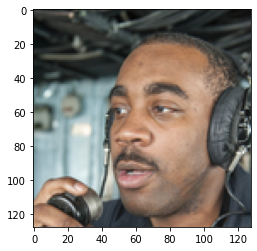

In [ ]:
#run to show image in colab 
plt.imshow(img) 
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

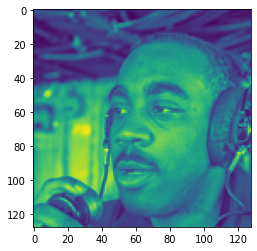

In [ ]:
gray_imgs = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_imgs)
#grayscale


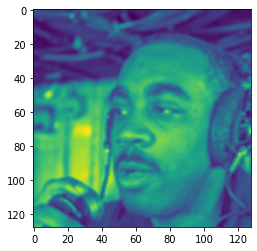

In [ ]:
blurimg = cv2.blur(gray_imgs,(2,2));
plt.imshow(blurimg )

Face detection picture

In [ ]:
# FaceCascade = cv.CascadeClassifier('/content/Gans-Data/haarcascades/haarcascade_frontalface_alt.xml')

In [ ]:
# face = FaceCascade.detectMultiScale( gray_imgs,scaleFactor = 1.1,minNeighbors = 10,)
# print (face)

In [ ]:
# for (x,y,w,h) in face:  
#   cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),20)  #draw ze face
# Detected_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# cv2_imshow(Detected_img)


In [ ]:
# imgcrop=[]  # facecroped
# for (x,y,w,h) in face:
#   crop = Detected_img  [y:y+h,x:x+w ]
#   imgcrop.append(crop)
# plt.imshow(imgcrop[0]) 

In [ ]:
# face_edge = cv.Canny(imgcrop[0], threshold1 =  180 , threshold2 = 200 ) #edge detection using canny 
# plt.imshow(face_edge)

**Preparing Data** (run only when propping data) 
cover and shift / 

In [ ]:
items = os.listdir('/content/drive/MyDrive/Dataset3')
img_dir = '/content/drive/MyDrive/Dataset3'

In [ ]:
glob.glob?

# glob.glob returns a list of paths matching a pathname *pattern*
before = glob.glob(img_dir)

# what you need is a regular expression 
img_file_pattern = os.path.join(img_dir, '*.png')
after = glob.glob(img_file_pattern)

# print(f'before {img_dir}: ', before)
# print(f'after {img_file_pattern}:', after)


before /content/drive/MyDrive/Dataset3:  ['/content/drive/MyDrive/Dataset3']
after /content/drive/MyDrive/Dataset3/*.png: ['/content/drive/MyDrive/Dataset3/69008.png', '/content/drive/MyDrive/Dataset3/68804.png', '/content/drive/MyDrive/Dataset3/68651.png', '/content/drive/MyDrive/Dataset3/68816.png', '/content/drive/MyDrive/Dataset3/68835.png', '/content/drive/MyDrive/Dataset3/68488.png', '/content/drive/MyDrive/Dataset3/68945.png', '/content/drive/MyDrive/Dataset3/68952.png', '/content/drive/MyDrive/Dataset3/68903.png', '/content/drive/MyDrive/Dataset3/68591.png', '/content/drive/MyDrive/Dataset3/68505.png', '/content/drive/MyDrive/Dataset3/68960.png', '/content/drive/MyDrive/Dataset3/69064.png', '/content/drive/MyDrive/Dataset3/68658.png', '/content/drive/MyDrive/Dataset3/68617.png', '/content/drive/MyDrive/Dataset3/69099.png', '/content/drive/MyDrive/Dataset3/68757.png', '/content/drive/MyDrive/Dataset3/68599.png', '/content/drive/MyDrive/Dataset3/68868.png', '/content/drive/MyDriv

In [ ]:
all_img = []
for img in glob.glob(img_file_pattern):
    n = cv2.imread(img)
    rgb_img = cv2.cvtColor(n,cv2.COLOR_BGR2RGB)
    all_img.append(rgb_img)

print(f'read {len(all_img)} images')

read 8760 images


In [ ]:
#250 x #250

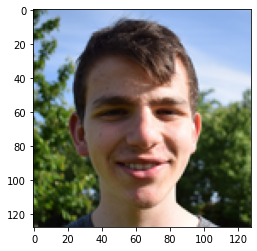

In [ ]:
plt.imshow(all_img[1]) # still in BGR mode, convert ot RGB for accurate presentation

In [ ]:
FaceCascade = cv2.CascadeClassifier('/content/Gans-Data/haarcascades/haarcascade_frontalface_alt.xml')

In [ ]:
i = 0
for img in glob.glob(img_file_pattern):
  print(img)
  read = cv2.imread(img)
  gray =  cv2.cvtColor(read,cv2.COLOR_BGR2GRAY)
  face = FaceCascade.detectMultiScale(gray,scaleFactor = 1.2,minNeighbors = 3,)
  for (x,y,w,h) in face:    
     crop = read[y:y+h,x:x+w ]
     resized = cv2.resize(crop,(600,600))
  bordeCanny = cv2.Canny(crop,150 ,150)
  reborde = cv2.resize(bordeCanny,(600,600))
  cv2.imwrite("/content/drive/MyDrive/Datajoin/A/test/"+str(i)+".jpg",reborde)
  cv2.imwrite("/content/drive/MyDrive/Datajoin/B/test/"+str(i)+".jpg",resized)
  i+=1

**Prepping Data**

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [ ]:
!pip install -r /content/pytorch-CycleGAN-and-pix2pix/requirements.txt

In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!python datasets/combine_A_and_B.py --fold_A /content/drive/MyDrive/Datajoin/A --fold_B  /content/drive/MyDrive/Datajoin/B --fold_AB /content/drive/MyDrive/Datajoin

[fold_A] =  /content/drive/MyDrive/Datajoin/A
[fold_B] =  /content/drive/MyDrive/Datajoin/B
[fold_AB] =  /content/drive/MyDrive/Datajoin
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = test, use 8760/8760 images
split = test, number of images = 8760




---



In [ ]:
import cv2

In [ ]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

albumentations==1.2.1 is successfully installed


In [ ]:
import albumentations 
from albumentations.pytorch import ToTensorV2

In [ ]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
class config():
  DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
  TRAIN_DIR = "/content/drive/MyDrive/Dataset/train"
  VAL_DIR = "/content/drive/MyDrive/Dataset/val"
  LEARNING_RATE = 2e-4
  BATCH_SIZE = 4
  NUM_WORKERS = 2
  IMAGE_SIZE = 256
  CHANNELS_IMG = 3
  L1_LAMBDA = 100
  LAMBDA_GP = 10
  NUM_EPOCHS = 1
  LOAD_MODEL = True
  SAVE_MODEL = True
  CHECKPOINT_DISC = "/content/drive/MyDrive/checkpoint/disc.pth.tar"
  CHECKPOINT_GEN = "/content/drive/MyDrive/checkpoint/gen.pth.tar"
  both_transform = A.Compose(
    [A.Resize(width=256, height=256),], additional_targets={"image0": "image"},
  )

  transform_only_input = A.Compose(
      [
          A.HorizontalFlip(p=0.5),
          A.ColorJitter(p=0.2),
          A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,),
         ToTensorV2(),
     ]
  )

  transform_only_mask = A.Compose(
      [
          A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,),
          ToTensorV2(),
      ]
  )

**UTiLS**

In [ ]:
import torch
from torchvision.utils import save_image

def save_some_examples(gen, val_loader, epoch, folder):
    x, y = next(iter(val_loader))
    x, y = x.to(config.DEVICE), y.to(config.DEVICE)
    gen.eval()
    with torch.no_grad():
        y_fake = gen(x)
        y_fake = y_fake * 0.5 + 0.5  # remove normalization#
        save_image(y_fake, folder + f"/y_gen_{epoch}.png")
        save_image(x * 0.5 + 0.5, folder + f"/input_{epoch}.png")
        if epoch == 1:
            save_image(y * 0.5 + 0.5, folder + f"/label_{epoch}.png")
    gen.train()


def save_checkpoint(model, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    checkpoint = {
        "state_dict": model.state_dict(),
    }
    torch.save(checkpoint, filename)


def load_checkpoint(checkpoint_file, model, optimizer, lr):
    print("=> Loading checkpoint")
    checkpoint = torch.load(checkpoint_file, map_location=config.DEVICE)
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    # If we don't do this then it will just have learning rate of old checkpoint
    # and it will lead to many hours of debugging \:
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

**DATASET** **CLASS**

In [ ]:
import numpy as np
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import save_image


class FaceDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.list_files = os.listdir(self.root_dir)

    def __len__(self):
        return len(self.list_files)

    def __getitem__(self, index):
        img_file = self.list_files[index]
        img_path = os.path.join(self.root_dir, img_file)
        image = np.array(Image.open(img_path))
        input_image = image[:, :600, :]
        target_image = image[:, 600:, :]

        augmentations = config.both_transform(image=input_image, image0=target_image)
        input_image = augmentations["image"]
        target_image = augmentations["image0"]

        input_image = config.transform_only_input(image=input_image)["image"]
        target_image = config.transform_only_mask(image=target_image)["image"]

        return input_image, target_image

    

**GENERATOR**

In [ ]:
import torch
import torch.nn as nn

class Block(nn.Module):
    def __init__(self, in_channels, out_channels, down=True, act="relu", use_dropout=False):
        super(Block, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 4, 2, 1, bias=False, padding_mode="reflect")
            if down
            else nn.ConvTranspose2d(in_channels, out_channels, 4, 2, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU() if act == "relu" else nn.LeakyReLU(0.2),
        )

        self.use_dropout = use_dropout
        self.dropout = nn.Dropout(0.5)
        self.down = down

    def forward(self, x):
        x = self.conv(x)
        return self.dropout(x) if self.use_dropout else x


class Generator(nn.Module):
    def __init__(self, in_channels=3, features=64):
        super().__init__()
        self.initial_down = nn.Sequential(
            nn.Conv2d(in_channels, features, 4, 2, 1, padding_mode="reflect"),
            nn.LeakyReLU(0.2),
        )
        self.down1 = Block(features, features * 2, down=True, act="leaky", use_dropout=False)
        self.down2 = Block(
            features * 2, features * 4, down=True, act="leaky", use_dropout=False
        )
        self.down3 = Block(
            features * 4, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down4 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down5 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down6 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.bottleneck = nn.Sequential(
            nn.Conv2d(features * 8, features * 8, 4, 2, 1), nn.ReLU()
        )

        self.up1 = Block(features * 8, features * 8, down=False, act="relu", use_dropout=True)
        self.up2 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=True
        )
        self.up3 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=True
        )
        self.up4 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=False
        )
        self.up5 = Block(
            features * 8 * 2, features * 4, down=False, act="relu", use_dropout=False
        )
        self.up6 = Block(
            features * 4 * 2, features * 2, down=False, act="relu", use_dropout=False
        )
        self.up7 = Block(features * 2 * 2, features, down=False, act="relu", use_dropout=False)
        self.final_up = nn.Sequential(
            nn.ConvTranspose2d(features * 2, in_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh(),
        )

    def forward(self, x):
        d1 = self.initial_down(x)
        d2 = self.down1(d1)
        d3 = self.down2(d2)
        d4 = self.down3(d3)
        d5 = self.down4(d4)
        d6 = self.down5(d5)
        d7 = self.down6(d6)
        bottleneck = self.bottleneck(d7)
        up1 = self.up1(bottleneck)
        up2 = self.up2(torch.cat([up1, d7], 1))
        up3 = self.up3(torch.cat([up2, d6], 1))
        up4 = self.up4(torch.cat([up3, d5], 1))
        up5 = self.up5(torch.cat([up4, d4], 1))
        up6 = self.up6(torch.cat([up5, d3], 1))
        up7 = self.up7(torch.cat([up6, d2], 1))
        return self.final_up(torch.cat([up7, d1], 1))


def test():
    x = torch.randn((1, 3, 256, 256))
    model = Generator(in_channels=3, features=64)
    preds = model(x)
    print(preds.shape)


if __name__ == "__main__":
    test()

torch.Size([1, 3, 256, 256])


**DISCRIMINATOR**

In [ ]:
import torch
import torch.nn as nn


class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(CNNBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(
                in_channels, out_channels, 4, stride, 1, bias=False, padding_mode="reflect"
            ),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
        )

    def forward(self, x):
        return self.conv(x)


class Discriminator(nn.Module):
    def __init__(self, in_channels=3, features=[64, 128, 256, 512]):
        super().__init__()
        self.initial = nn.Sequential(
            nn.Conv2d(
                in_channels * 2,
                features[0],
                kernel_size=4,
                stride=2,
                padding=1,
                padding_mode="reflect",
            ),
            nn.LeakyReLU(0.2),
        )

        layers = []
        in_channels = features[0]
        for feature in features[1:]:
            layers.append(
                CNNBlock(in_channels, feature, stride=1 if feature == features[-1] else 2),
            )
            in_channels = feature

        layers.append(
            nn.Conv2d(
                in_channels, 1, kernel_size=4, stride=1, padding=1, padding_mode="reflect"
            ),
        )

        self.model = nn.Sequential(*layers)

    def forward(self, x, y):
        x = torch.cat([x, y], dim=1)
        x = self.initial(x)
        x = self.model(x)
        return x


def test():
    x = torch.randn((1, 3, 256, 256))
    y = torch.randn((1, 3, 256, 256))
    model = Discriminator(in_channels=3)
    preds = model(x, y)
    print(model)
    print(preds.shape)


if __name__ == "__main__":
    test()

Discriminator(
  (initial): Sequential(
    (0): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=reflect)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (model): Sequential(
    (0): CNNBlock(
      (conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False, padding_mode=reflect)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (1): CNNBlock(
      (conv): Sequential(
        (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False, padding_mode=reflect)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (2): CNNBlock(
      (conv): Sequential(
        (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False, padding_mode=reflect)
        (1): Batc

**Train**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision.utils import save_image

torch.backends.cudnn.benchmark = True
#Dataset

def train_fn(
    disc, gen, loader, opt_disc, opt_gen, l1_loss, bce, g_scaler, d_scaler,
):
    loop = tqdm(loader, leave=True)

    for idx, (x, y) in enumerate(loop):
        x = x.to(config.DEVICE)
        y = y.to(config.DEVICE)

        # Train Discriminator
        with torch.cuda.amp.autocast():
            y_fake = gen(x)
            D_real = disc(x, y)
            D_real_loss = bce(D_real, torch.ones_like(D_real))
            D_fake = disc(x, y_fake.detach())
            D_fake_loss = bce(D_fake, torch.zeros_like(D_fake))
            D_loss = (D_real_loss + D_fake_loss) / 2

        disc.zero_grad()
        d_scaler.scale(D_loss).backward()
        d_scaler.step(opt_disc)
        d_scaler.update()

        # Train generator
        with torch.cuda.amp.autocast():
            D_fake = disc(x, y_fake)
            G_fake_loss = bce(D_fake, torch.ones_like(D_fake))
            L1 = l1_loss(y_fake, y) * config.L1_LAMBDA
            G_loss = G_fake_loss + L1

        opt_gen.zero_grad()
        g_scaler.scale(G_loss).backward()
        g_scaler.step(opt_gen)
        g_scaler.update()

        if idx % 10 == 0:
            loop.set_postfix(
                D_real=torch.sigmoid(D_real).mean().item(),
                D_fake=torch.sigmoid(D_fake).mean().item(),
            )


def main():
    disc = Discriminator(in_channels=3).to(config.DEVICE)
    gen = Generator(in_channels=3, features=64).to(config.DEVICE)
    opt_disc = optim.Adam(disc.parameters(), lr=config.LEARNING_RATE, betas=(0.5, 0.999),)
    opt_gen = optim.Adam(gen.parameters(), lr=config.LEARNING_RATE, betas=(0.5, 0.999))
    BCE = nn.BCEWithLogitsLoss()
    L1_LOSS = nn.L1Loss()

    if config.LOAD_MODEL:
        load_checkpoint(
            config.CHECKPOINT_GEN, gen, opt_gen, config.LEARNING_RATE,
        )
        load_checkpoint(
            config.CHECKPOINT_DISC, disc, opt_disc, config.LEARNING_RATE,
        )

    train_dataset = FaceDataset(root_dir=config.TRAIN_DIR)
    train_loader = DataLoader(
        train_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=True,
        num_workers=config.NUM_WORKERS,
    )
    g_scaler = torch.cuda.amp.GradScaler()
    d_scaler = torch.cuda.amp.GradScaler()
    val_dataset = FaceDataset(root_dir=config.VAL_DIR)
    val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

    for epoch in range(config.NUM_EPOCHS):
        train_fn(
            disc, gen, train_loader, opt_disc, opt_gen, L1_LOSS, BCE, g_scaler, d_scaler,
        )  

        if config.SAVE_MODEL and epoch % 5 == 0:
            save_checkpoint(gen, opt_gen, filename=config.CHECKPOINT_GEN)
            save_checkpoint(disc, opt_disc, filename=config.CHECKPOINT_DISC)

        save_some_examples(gen, val_loader,folder="/content/evaluation")


if __name__ == "__main__":
    main()

=> Loading checkpoint
=> Loading checkpoint


FileNotFoundError: ignored

In [ ]:
plt.plot(range(0,10), L1_LOSS, label='L1 Loss')
plt.plot(range(0,10), BCE, label='valid loss')
plt.legend()

NameError: ignored

In [ ]:
output = cv2.imread ("/content/evaluation")
plt.imread(output)